### O que é o IDESP?

O IDESP (Índice de Desenvolvimento da Educação do Estado de São Paulo) é um indicador que mede a qualidade das escolas paulistas, combinando o desempenho dos alunos nas provas do SARESP (avaliação de proficiência em Português e Matemática) com o fluxo escolar (em quanto tempo aprenderam) série a série. A prova é aplicada anualmente e acontece nos meses de novembro e dezembro de cada ano. 

Os "Anos Iniciais" classificam os alunos entre o 1º e  ano do ensino fundamental.\
Os "Anos Finais" classificam os alunos do 6º ao 9º ano do ensino fundamental.\
E o "Ensino Médio" classifica estudantes do ensino médio, do 1º ao 3º ano.

Nota: O IDESP é aplicado ao último ano do ciclo, sendo apenas o 5º ano dos anos iniciais, o 9º ano dos anos finais e o 3º ano do ensino médio avaliados para gerar uma nota para aquele grupo como um todo.

### Qual objetivo dessa análise?

Limpar, organizar e analisar os dados disponíveis (2007-2022) a fim de gerar insights e contribuir para a pesquisa.

Ao final dessa análise terei respondido as seguintes perguntas:

A. Os dados foram devidamente coletados ao longo desses anos?\
B. Houve uma melhora significativa na média geral das escolas durante os anos analisados? \
C. Qual impacto real da pandemia (e posterior educação EAD) na evolução do índice?\
D. Houve aumento ou redução no número de escolas avaliadas? Esse número pode ter influenciado o crescimento observado do índice?

### A quem essa análise interessa?

Responsáveis pelo índice, pelas suas métricas e aplicações. E também a todos os interessados pela educação pública no Estado de São Paulo.

### 0. Importação de bibliotecas

In [222]:
import matplotlib.pyplot as mpl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.ticker as mtick

df = pd.read_csv("IDESP_10_anos.csv", sep=";", on_bad_lines="skip")
sns.set_style('whitegrid')

In [223]:
df.head(2)

,CODIGO CIE,CODIGO INEP,DIRETORIA,ESCOLA,MUNICIPIO,NIVEL ENSINO,2007,2008,2009,2010,...,2012,2013,2014,2015,2016,2017,2018,2019,2021,2022
0,12,35000012,NORTE 1,AYRES DE MOURA PROFESSOR ...,SAO PAULO,ENSINO MEDIO,"1,37","1,86","1,75","1,92",...,"1,79",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,12,35000012,NORTE 1,AYRES DE MOURA PROFESSOR ...,SAO PAULO,ANOS FINAIS,"2,9","2,91","2,59","2,42",...,"2,29","2,64","3,13","3,18","3,26","4,2","4,23","4,86","3,55","4,25"


### 1. Limpeza e organização dos dados

In [224]:
df_bckp = df.copy() 
df_bckp.head(2)

,CODIGO CIE,CODIGO INEP,DIRETORIA,ESCOLA,MUNICIPIO,NIVEL ENSINO,2007,2008,2009,2010,...,2012,2013,2014,2015,2016,2017,2018,2019,2021,2022
0,12,35000012,NORTE 1,AYRES DE MOURA PROFESSOR ...,SAO PAULO,ENSINO MEDIO,"1,37","1,86","1,75","1,92",...,"1,79",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,12,35000012,NORTE 1,AYRES DE MOURA PROFESSOR ...,SAO PAULO,ANOS FINAIS,"2,9","2,91","2,59","2,42",...,"2,29","2,64","3,13","3,18","3,26","4,2","4,23","4,86","3,55","4,25"


In [225]:
# CONVERSÃO DE WIDE PARA LONG. Criei uma coluna para 'Ano' com as médias de cada ano por escola em 'Media Idesp'
df_bckp = df_bckp.melt(id_vars=['CODIGO CIE', 'CODIGO INEP', 'DIRETORIA', 'ESCOLA', 'MUNICIPIO', 'NIVEL ENSINO'], #linhas fixas
    var_name="ANO",
    value_name='MEDIA IDESP')

# CONVERSÃO DE TIPOS TEXTUAIS PARA NÚMERICOS
df_bckp['MEDIA IDESP'] = df_bckp['MEDIA IDESP'].str.replace(",",".").astype('float')
df_bckp['ANO'] = df_bckp['ANO'].astype('int')

Esse é o novo formato (long) e os novos tipos de dado convertidos:

In [226]:
df_bckp.head(1)

,CODIGO CIE,CODIGO INEP,DIRETORIA,ESCOLA,MUNICIPIO,NIVEL ENSINO,ANO,MEDIA IDESP
0,12,35000012,NORTE 1,AYRES DE MOURA PROFESSOR ...,SAO PAULO,ENSINO MEDIO,2007,1.37


In [227]:
print('### Informações gerais ###\n')
df_bckp.info()
print('\n### Contagem de duplicatas ###')
df_bckp.duplicated().sum()

### Informações gerais ###

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153750 entries, 0 to 153749
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   CODIGO CIE    153750 non-null  int64  
 1   CODIGO INEP   153750 non-null  int64  
 2   DIRETORIA     153750 non-null  object 
 3   ESCOLA        153750 non-null  object 
 4   MUNICIPIO     153750 non-null  object 
 5   NIVEL ENSINO  153750 non-null  object 
 6   ANO           153750 non-null  int64  
 7   MEDIA IDESP   133232 non-null  float64
dtypes: float64(1), int64(3), object(4)
memory usage: 9.4+ MB

### Contagem de duplicatas ###


np.int64(0)

In [228]:
#RENOMEANDO AS COLUNAS P/ MANTER PADRÃO DE ESTUDO ANTERIOR (2023-2024)

df_bckp = df_bckp.rename(columns={'CODIGO CIE': 'CODIGO_ESCOLA', 
                                  'ESCOLA':'NOME_ESCOLA', 
                                  'DIRETORIA':'NOME_DIRETORIA',
                                   'CODIGO INEP': 'CODIGO_INEP',
                                   'MUNICIPIO':'NOME_MUNICIPIO',
                                   'MEDIA IDESP':'MEDIA_IDESP', 
                                   'NIVEL ENSINO': 'NIVEL_ENSINO'})

colunas_ordenadas = ['ANO','CODIGO_ESCOLA', 'CODIGO_INEP', 'NOME_DIRETORIA', 'NOME_ESCOLA', 'NOME_MUNICIPIO', 'NIVEL_ENSINO', 'MEDIA_IDESP']
df_bckp = df_bckp[colunas_ordenadas]

df_bckp.head()

,ANO,CODIGO_ESCOLA,CODIGO_INEP,NOME_DIRETORIA,NOME_ESCOLA,NOME_MUNICIPIO,NIVEL_ENSINO,MEDIA_IDESP
0,2007,12,35000012,NORTE 1,AYRES DE MOURA PROFESSOR ...,SAO PAULO,ENSINO MEDIO,1.37
1,2007,12,35000012,NORTE 1,AYRES DE MOURA PROFESSOR ...,SAO PAULO,ANOS FINAIS,2.90
2,2007,24,35000024,NORTE 1,GAVIAO PEIXOTO BRIGADEIRO ...,SAO PAULO,ENSINO MEDIO,1.32
3,2007,24,35000024,NORTE 1,GAVIAO PEIXOTO BRIGADEIRO ...,SAO PAULO,ANOS FINAIS,2.52
4,2007,24,35000024,NORTE 1,GAVIAO PEIXOTO BRIGADEIRO ...,SAO PAULO,ANOS INICIAIS,2.88


### 2. Análise exploratória dos dados

In [229]:
print(f"\n###### Contagem de nulos por categoria #####") 
df_bckp.groupby("NIVEL_ENSINO")["MEDIA_IDESP"].apply(lambda x: x.isnull().sum())


###### Contagem de nulos por categoria #####


NIVEL_ENSINO
ANOS FINAIS      5862
ANOS INICIAIS    9447
ENSINO MEDIO     5209
Name: MEDIA_IDESP, dtype: int64

In [230]:
#FILTRA POR NVL. DE ENSINO E DEPOIS AGRUPA PELA MÉDIA DE CADA ANO

df_bckp_iniciais = df_bckp.loc[(df_bckp['NIVEL_ENSINO'] == 'ANOS INICIAIS')].groupby('ANO')['MEDIA_IDESP'].mean()
df_bckp_finais = df_bckp.loc[(df_bckp['NIVEL_ENSINO'] == 'ANOS FINAIS')].groupby('ANO')['MEDIA_IDESP'].mean() 
df_bckp_medio = df_bckp.loc[(df_bckp['NIVEL_ENSINO'] == 'ENSINO MEDIO')].groupby('ANO')['MEDIA_IDESP'].mean() 

In [231]:
#COLETA VALORES AUSENTES/NÃO AUSENTES POR ANO P/ POSTERIOR USO EM GRÁFICO

df_anos_iniciais_notnull = df_bckp.loc[(df_bckp['NIVEL_ENSINO'] == 'ANOS INICIAIS')].groupby('ANO')['MEDIA_IDESP'].apply(lambda x: x.notnull().sum())
df_anos_iniciais_isnull = df_bckp.loc[(df_bckp['NIVEL_ENSINO'] == 'ANOS INICIAIS')].groupby('ANO')['MEDIA_IDESP'].apply(lambda x: x.isnull().sum())

df_anos_finais_notnull = df_bckp.loc[(df_bckp['NIVEL_ENSINO'] == 'ANOS FINAIS')].groupby('ANO')['MEDIA_IDESP'].apply(lambda x: x.notnull().sum()) 
df_anos_finais_isnull = df_bckp.loc[(df_bckp['NIVEL_ENSINO'] == 'ANOS FINAIS')].groupby('ANO')['MEDIA_IDESP'].apply(lambda x: x.isnull().sum()) 

df_ensino_medio_notnull = df_bckp.loc[(df_bckp['NIVEL_ENSINO'] == 'ENSINO MEDIO')].groupby('ANO')['MEDIA_IDESP'].apply(lambda x: x.notnull().sum()) 
df_ensino_medio_isnull = df_bckp.loc[(df_bckp['NIVEL_ENSINO'] == 'ENSINO MEDIO')].groupby('ANO')['MEDIA_IDESP'].apply(lambda x: x.isnull().sum()) 


In [232]:
#GARANTINDO QUE A MESMA QUANTIDADE DE ESCOLAS ESTÁ SENDO AVALIADA ANO APÓS ANO
#REAPROVEITANDO VARIÁVEIS QUE CONTÉM NULOS/NÃO NULOS

anos_iniciais_qntd = df_anos_iniciais_notnull + df_anos_iniciais_isnull
anos_finais_qntd = df_anos_finais_notnull + df_anos_finais_isnull
ensino_medio_qntd = df_ensino_medio_notnull + df_ensino_medio_isnull

#TODOS OS PERÍODOS FORAM CONSISTENTES AO MANTER A MESMA QUANTIDADE DE ESCOLAS AO LONGO DOS ANOS

print("Quantidade de escolas incluídas no índice ao longo de todos os anos (2007-2022):\n")
print (f"Anos iniciais: {anos_iniciais_qntd.iloc[0]}")
print (f"Anos finais: {anos_finais_qntd.iloc[0]}")
print (f"Ensino médio: {ensino_medio_qntd.iloc[0]}")


Quantidade de escolas incluídas no índice ao longo de todos os anos (2007-2022):

Anos iniciais: 2263
Anos finais: 4071
Ensino médio: 3916


### 4. Descobertas e sugestões

A. Os dados foram devidamente coletados ao longo desses anos?

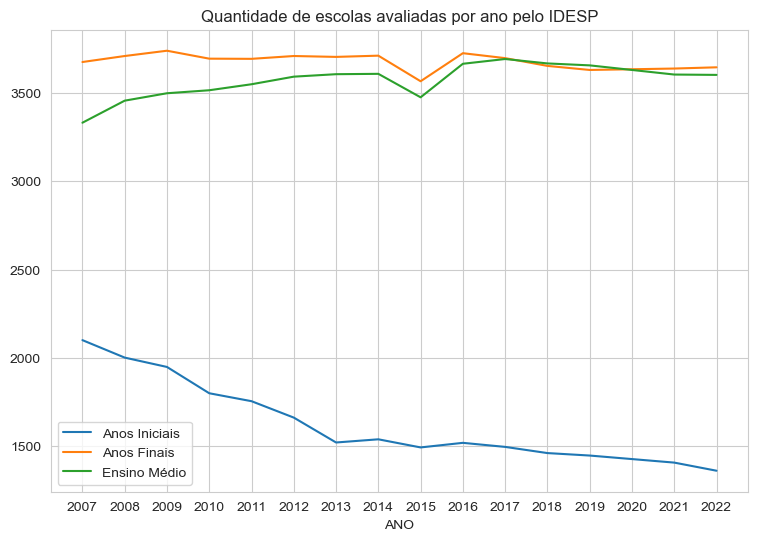

In [233]:
from matplotlib.ticker import MultipleLocator

#GERAÇÃO DO GRÁFICO

mpl.figure(figsize=(9,6))

df_anos_iniciais_notnull.plot(label='Anos Iniciais')
df_anos_finais_notnull.plot(label='Anos Finais')
df_ensino_medio_notnull.plot(label='Ensino Médio')

mpl.title('Quantidade de escolas avaliadas por ano pelo IDESP')
mpl.xticks(range(2007,2023))

mpl.legend()
mpl.show()

Análise: Para os níveis "Anos Finais" e "Ensino Médio" sim, houve uma constante na pesquisa, ou seja, os dados do SARESP foram recebidos e processados, ajudando a entender a situação das escolas ao longo dos anos. No entanto, o nível de ensino "Anos Iniciais" foram progressivamente menos avaliados, o que pode indicar um "abandono" dessa faixa de pesquisa por parte do SARESP.
> Recomendo posterior investigação no porquê de os dados nos "Anos Iniciais" terem sido cada vez menos avaliados, além de possível campanha para que a coleta seja mais intensa, já que a ausência de dados impede a geração de insights.

B. Houve uma melhora significativa na média geral das escolas durante os anos analisados?\
C. Qual impacto real da pandemia (e posterior educação EAD) na evolução do índice?

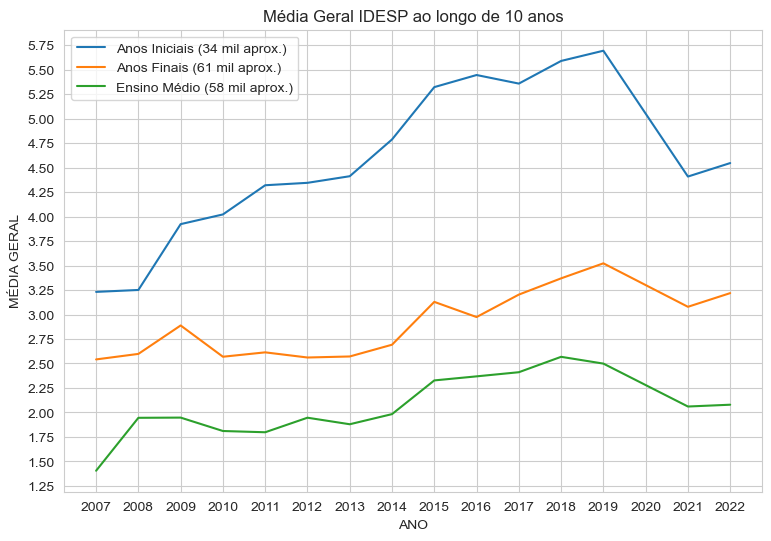

In [234]:
#GERAÇÃO DO GRÁFICO

mpl.figure(figsize=(9,6))

df_bckp_iniciais.plot(label='Anos Iniciais (34 mil aprox.)').yaxis.set_major_locator(mtick.MultipleLocator(0.25))
df_bckp_finais.plot(label='Anos Finais (61 mil aprox.)').yaxis.set_major_locator(mtick.MultipleLocator(0.25))
df_bckp_medio.plot(label='Ensino Médio (58 mil aprox.)').yaxis.set_major_locator(mtick.MultipleLocator(0.25))

mpl.title('Média Geral IDESP ao longo de 10 anos')
mpl.xticks(range(2007,2023))
mpl.ylabel('MÉDIA GERAL')

mpl.legend()
mpl.show()

Análise: De 2007 até o final de 2019 houve uma crescente tímida no índice com um período de estagnação entre 2010-2014. Porém, no ano de 2020 a média geral chegou a 6 anos de retrocesso. Minha suposição é que isso aconteceu pelo início da pandemia da Covid-19 e início das aulas EAD a partir de março de 2020. 
Como já citado no gráfico anterior, os "Anos Iniciais" foram a faixa com maior crescimento no índice, mas é necessário considerar que essa nível de ensino teve a menor quantidade de dados, o que pode fazer com que poucos valores tenham maior impacto na média geral. É importante entender o porquê da ausência desses dados, para saber se não houve viés de composição, removendo escolas com médias inferiores.
> Em relação ao retrocesso, sugiro a prevenção para situações futuras que fujam do controle (como o investimento em infraestrutura), já que a possível falta de preparo levou a uma piora muito considerável na educação de São Paulo.\
> Em relação ao possível viés de composição, continuo na seção abaixo.

D. Em que medida a redução do número de escolas avaliadas pode ter influenciado o crescimento observado do IDESP?

In [235]:
df_avaliadas = df_bckp[df_bckp['MEDIA_IDESP'].notna()].copy() 

df_ai = df_avaliadas[df_avaliadas['NIVEL_ENSINO'] == 'ANOS INICIAIS'].copy() #CRIA DF COM O FILTRO: 'ANOS INICIAIS' E PESQUISA REALIZADA 
df_ai = df_ai.sort_values(['CODIGO_INEP', 'ANO'])

df_ai['ANO_SEGUINTE_AVALIADO'] = (df_ai.groupby('CODIGO_INEP')['ANO'].shift(-1)) #CRIA UMA COLUNA COM O PRÓXIMO VALOR DE 'ANO' DISPONÍVEL NO DF

df_ai['SAIU_DO_CALCULO'] = (df_ai['ANO_SEGUINTE_AVALIADO'] != df_ai['ANO'] + 1) 
#CHECA SE HÁ CONTINUIDADE ANUAL (2007>2008>2009), SE HOUVER RUPTURA (2007>2009) RETORNA 'TRUE' NA NOVA COLUNA 'SAIU DO CALCULO' 

sairam = df_ai[df_ai['SAIU_DO_CALCULO']]
ficaram = df_ai[~df_ai['SAIU_DO_CALCULO']]
#GUARDA ESCOLAS QUE TIVERAM E NÃO TIVERAM CONTINUIDADE NA PESQUISA BASEADO NA CONDIÇÃO ACIMA 

media_sairam_ano = (sairam.groupby('ANO')['MEDIA_IDESP'].mean())
media_ficaram_ano = (ficaram.groupby('ANO')['MEDIA_IDESP'].mean())


comparacao = (
    pd.DataFrame({
        'media_sairam': media_sairam_ano,
        'media_ficaram': media_ficaram_ano
    })
    .dropna()
)
#CRIA DF COM ÍNDICE EM COMUM (ANO) E MÉDIAS DAS ESCOLAS QUE FICARAM E SAÍRAM NAQUELE PERÍODO

comparacao['diferenca'] = (
    comparacao['media_ficaram'] - comparacao['media_sairam']
)
print(f"    DataFrame para testar viés de composição:\n\n {comparacao}")
print("\n12 dos 13 anos avaliados mostram diferença positiva.")

    DataFrame para testar viés de composição:

       media_sairam  media_ficaram  diferenca
ANO                                         
2007      3.065169       3.240807   0.175638
2008      2.985481       3.265055   0.279575
2009      3.949615       3.919932  -0.029683
2010      3.599114       4.041087   0.441973
2011      4.148190       4.331856   0.183666
2012      3.992956       4.381618   0.388662
2013      3.898070       4.431866   0.533796
2014      4.206413       4.824156   0.617743
2015      4.861500       5.334256   0.472756
2016      4.741538       5.470095   0.728557
2017      5.056042       5.367643   0.311602
2018      5.449630       5.591472   0.141843
2021      4.173774       4.417657   0.243883

12 dos 13 anos avaliados mostram diferença positiva.


O viés de composição foi avaliado comparando a média IDESP das escolas no último ano em que contribuíram para o índice com a média das escolas que permaneceram avaliadas nesse mesmo ano. Em 12 de 13 anos avaliados as escolas que saíram do índice estavam abaixo da média daquele ano, o que indica que parte do crescimento do IDESP decorre da mudança na composição do conjunto avaliado. 

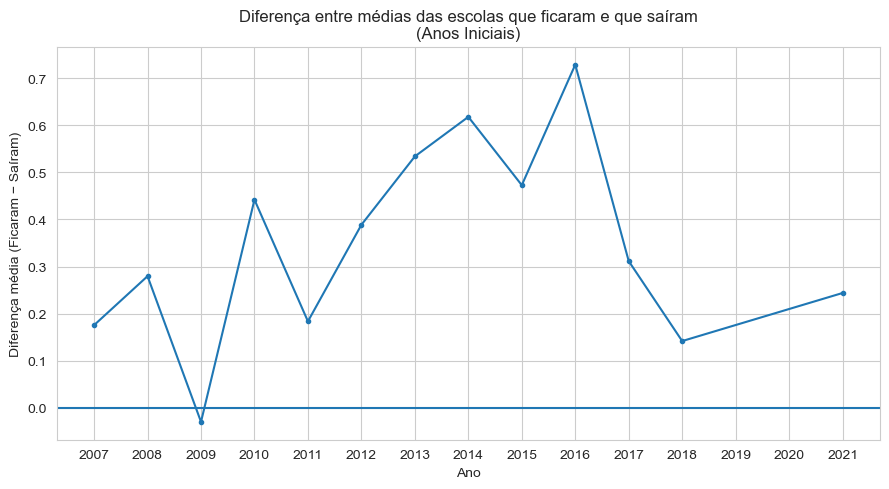

In [250]:
mpl.figure(figsize=(9, 5))

mpl.plot(
    comparacao.index,
    comparacao['diferenca'],
    marker='.'
)

mpl.axhline()

mpl.title('Diferença entre médias das escolas que ficaram e que saíram\n(Anos Iniciais)')
mpl.xlabel('Ano')
mpl.xticks(range(2007,2022))
mpl.ylabel('Diferença média (Ficaram − Saíram)')

mpl.tight_layout()
mpl.show()

No gráfico observamos a diferença entre a média das escolas que permaneceram no índice em cada ano e a média das escolas que deixaram de ser avaliadas. Quanto maior esse valor, maior a diferença de desempenho entre esses dois grupos. Nota-se que apenas em 2009 essa diferença não favorece as escolas que permaneceram, indicando que, nesse ano, não houve retirada predominante de escolas com desempenho menor. Em todos os demais anos, as escolas mantidas no índice apresentaram médias mais altas, com destaque para 2016, quando a diferença superou 0,7 pontos. Esse é um forte indicador de um viés de composição. 

In [273]:
qntd_escolas_avaliadas = pd.DataFrame ({'Numero de Avaliacoes': df_anos_iniciais_notnull})
qntd_escolas_avaliadas['Escolas Nao Avaliadas'] = qntd_escolas_avaliadas['Numero de Avaliacoes'].shift(1) -  qntd_escolas_avaliadas['Numero de Avaliacoes']
qntd_escolas_avaliadas

,Numero de Avaliacoes,Escolas Nao Avaliadas
ANO,,
2007,2100,NaN
2008,2001,99.0
2009,1948,53.0
2010,1799,149.0
2011,1754,45.0
2012,1661,93.0
2013,1520,141.0
2014,1538,-18.0
2015,1492,46.0


### 5. Considerações finais

Ao longo da análise, foi observada uma queda no número de escolas avaliadas nos anos iniciais, enquanto a média desse mesmo índice aumentou. A comparação ano a ano mostrou que, na maioria dos anos, as escolas que deixaram de ser avaliadas tinham médias mais baixas do que as que permaneceram. A metodologia do IDESP aplica o índice apenas ao último ano do ciclo (5 ano nesse caso) e reorganizações internas podem acabar removendo escolas da pesquisa. Mesmo com essa ressalva, como ano a ano as escolas que permaneceram foram as com a média mais alta, isso pode indicar que houve viés na composição dos dados. Em suma, as escolas que permanecem sendo avaliadas até o final já apresentavam melhores resultados desde o início. 

Além disso, foi de grande importância observar o real impacto da Covid-19 para a educação, que fez com que o índice regredisse em média seis anos. O que mostra como o governo do Estado de São Paulo não estava preparado para atender a demanda educacional longe dos núcleos escolares e reforça a importância de se estar preparado para situações como essa no futuro.

Esse projeto foi desenvolvido a fim de aplicar os meus estudos na área de análise de dados e está aberto a feedbacks. 
Obrigado por ler até aqui!